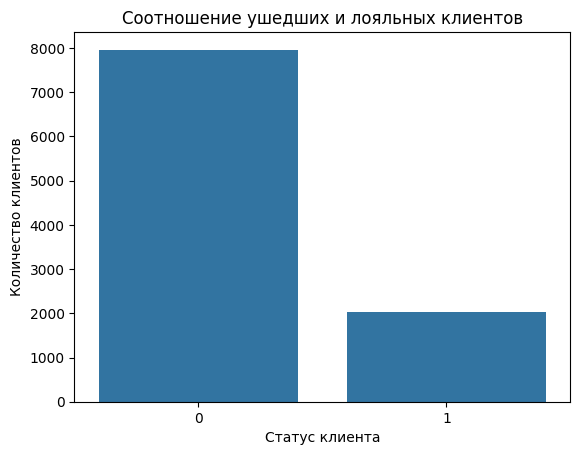

In [1]:
import pandas as pd
churn = pd.read_csv('C:/Users/mrmon/OneDrive/Документы/SF_repo/SF_pandas_01/Pandas_01/data/churn.csv') 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Подсчет количества ушедших и лояльных клиентов
churn_counts = churn['Exited'].value_counts()

# Построение столбчатой диаграммы
sns.barplot(x=churn_counts.index, y=churn_counts.values)

# Добавление подписей осей и заголовка
plt.xlabel('Статус клиента')
plt.ylabel('Количество клиентов')
plt.title('Соотношение ушедших и лояльных клиентов')

# Вывод графика
plt.show()

На графике видно, что соотношение ушедших и лояльных клиентов несколько смещено в сторону лояльных клиентов. То есть, лояльных клиентов в данном банке больше, чем ушедших. Однако отток клиентов все равно является значительным, что может быть проблемой для банка. Для удержания клиентов необходимо провести анализ причин их ухода и разработать меры по улучшению качества обслуживания и предлагаемых услуг.

In [8]:
# Фильтр для баланса > 2 500 долларов
balance_filter = churn['Balance'] > 2500

fig = px.histogram(churn[balance_filter], x='Balance', nbins=30, title='Распределение баланса пользователей с балансом > 2 500 долларов')

fig.show()

График позволит нам визуально оценить распределение баланса пользователей с более высокими значениями. Например, мы можем увидеть, что наибольшее количество пользователей с балансом выше 2 500 долларов имеют значения баланса примерно в диапазоне от 70 000 до 170 000 долларов.

Выводы:

Большинство пользователей с балансом выше 2 500 долларов имеют значения баланса примерно от 70 000 до 170 000 долларов.
Количество пользователей с балансом свыше 2 500 долларов снижается с увеличением значения баланса.

In [9]:
fig = px.histogram(churn, x="Balance", color="Exited", nbins=30)
fig.show()

Выводы:

Большинство клиентов банка имеют небольшие суммы на накопительном счете. 
Среди ушедших клиентов преобладают клиенты с небольшими балансами на счетах. 
Ушедшие клиенты, вероятно, не удовлетворены услугами банка и/или не видят преимущества в дальнейшем использовании его услуг. 
Лояльные клиенты могут иметь большие балансы на счетах, что может свидетельствовать о их удовлетворенности услугами банка и лояльности к нему. 
Таким образом, баланс клиента может быть одним из факторов, влияющих на решение об уходе из банка.

In [10]:
fig = px.box(churn, x='Exited', y='Age', points="all")
fig.show()

На графике можно наблюдать, что в группе ушедших клиентов возрастная категория от 45 до 60 лет представлена большим количеством потенциальных выбросов (точек за пределами "усов"). Это говорит о том, что ушедшие клиенты в этой возрастной группе являются отклонениями от общего распределения и могут иметь некоторые особенности, которые привели к их уходу.

Следовательно, банку стоит обратить особое внимание на клиентов возраста от 45 до 60 лет, так как возможно, в этой группе есть факторы, влияющие на их отток, и для их удержания могут потребоваться дополнительные меры или привилегии.

<Figure size 1000x600 with 0 Axes>

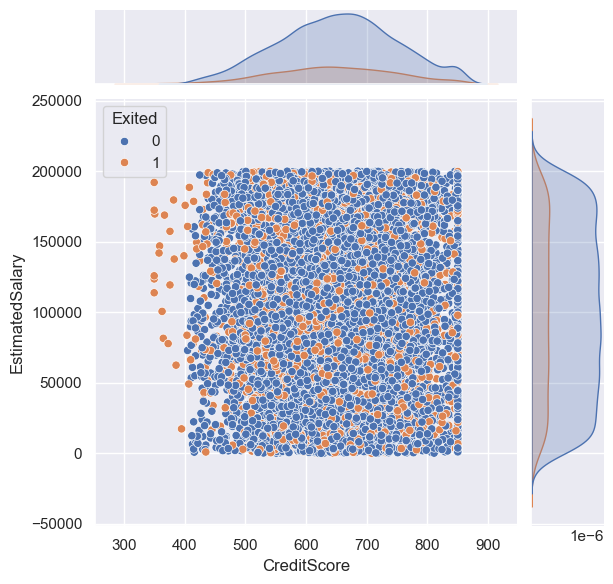

In [11]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.jointplot(data=churn, x="CreditScore", y="EstimatedSalary", hue="Exited", height=6);

На графике можно увидеть взаимосвязь между кредитным рейтингом клиента и его предполагаемой заработной платой. Отток клиентов обозначен разными цветами точек на графике. Из графика видно, что взаимосвязь между кредитным рейтингом и заработной платой не является явной. Нет особой насыщенности точек с определенным признаком оттока в какой-либо области графика.

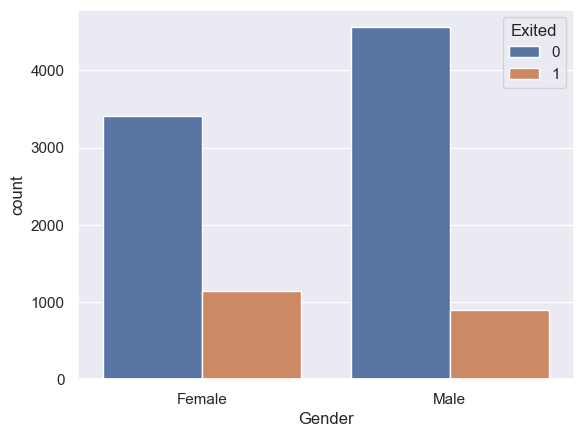

In [12]:
sns.countplot(data=churn, x='Gender', hue='Exited');


Вывод: из графика видно, что процент ушедших клиентов примерно одинаков для обоих полов.

In [23]:
# sns.barplot(data=churn, x='NumOfProducts', y='Exited', hue='NumOfProducts');

df_churn = churn.groupby('NumOfProducts')['Exited'].value_counts().unstack().reset_index()
df_churn.rename(columns={0:'Loyal', 1:'Exited'}, inplace=True)

fig = px.bar(df_churn, 
             x='NumOfProducts', 
             y=['Loyal', 'Exited'], 
             barmode='group',
             title='Отток клиентов в зависимости от числа приобретённых услуг')

fig.update_layout(xaxis_title='Количество приобретённых услуг',
                  yaxis_title='Количество клиентов',
                  legend_title='Статус лояльности')

fig.show()

Вывод: из графика видно, что большинство клиентов банка приобретает 1 или 2 услуги. Однако, с увеличением числа приобретенных услуг, процент оттока клиентов также увеличивается. Это может говорить о том, что клиенты, которые приобретают больше услуг, имеют больше возможностей перейти к конкурентам или уйти от банка. Этот график может быть полезным для разработки стратегии удержания клиентов, например, предоставления скидок или бонусов за приобретение дополнительных услуг.

In [3]:
churn['IsActiveMember'] = churn['IsActiveMember'].replace({1: 'Активный', 0: 'Неактивный'})

fig = px.histogram(churn, x='IsActiveMember', color='Exited', 
                   histfunc='count', barmode='group', 
                   category_orders={"Exited": [1, 0], "IsActiveMember": ["Активный", "Неактивный"]},
                   labels={'Exited': 'Статус лояльности', 'IsActiveMember': 'Статус активного клиента',
                           'count': 'Количество клиентов'})

fig.update_layout(title_text='Влияние статуса активного клиента на отток клиентов',
                  yaxis=dict(title='Количество клиентов'))

fig.show()

Выводы: Большинство клиентов являются активными и остаются лояльными.
Отток клиентов чаще происходит у неактивных клиентов.
Банку стоит уделить особое внимание неактивным клиентам, так как именно они показывают высокий уровень оттока.
Для уменьшения оттока среди неактивных клиентов банк может проводить специальные мероприятия, акции или предложения, которые могут заинтересовать таких клиентов и стимулировать их к активности.

In [6]:
churn_by_country = churn.groupby('Geography')['Exited'].mean().reset_index()
churn_by_country.columns = ['Country', 'Churn Rate']

fig = px.choropleth(churn_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='Churn Rate',
                    color_continuous_scale='Viridis',
                    title='Churn Rate by Country',
                    labels={'Churn Rate':'Churn Rate'},
                    hover_name='Country',
                    hover_data={'Country': False, 'Churn Rate': ':.2%'})
fig.show()

Вывод: Тепловая картограмма позволяет наглядно увидеть различия в доле ушедших клиентов в разных странах. Возможно, это связано с разными условиями предоставления услуг, качеством обслуживания, репутацией банка в определенной стране или другими факторами, которые необходимо дополнительно исследовать.

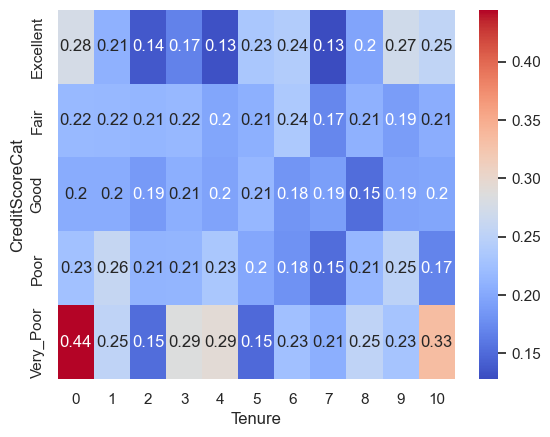

In [29]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)
pivot_table = churn.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True);

Выводы: На тепловой карте можно видеть, что клиенты с категорией кредитного рейтинга "Poor" и "Very Poor" чаще уходят, особенно если они пользуются услугами банка меньше 4 лет.
Клиенты с категориями кредитного рейтинга "Good", "Excellent" и "Top" реже уходят вне зависимости от количества лет использования услуг банка.
Клиенты с категорией кредитного рейтинга "Deep" вообще не уходят, но их количество в выборке слишком мало для сделанных выводов.